In [22]:
pip install kaggle

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     --------- ---------------------------- 20.5/82.7 kB 330.3 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/82.7 kB 812.7 kB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 928.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105795 sha256=5b98805c67edeece8167309f78f6684ab502ed0854ff790f3779bc9bd4c452a9
  Stored in directory: c:\users\michimon\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [89]:
# Import relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis

In [50]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [52]:
# Frequency table for 'category'
frequency_table = df['category'].value_counts().head(5)
frequency_table


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [56]:
# Calculating the proportion of each unique value in the 'category'
proportion_table = df['category'].value_counts(normalize=True)

proportion_table

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Alexa Built-In Devices                    0.000044
Motorbike Chassis                         0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

Text(0.5, 0, 'category')

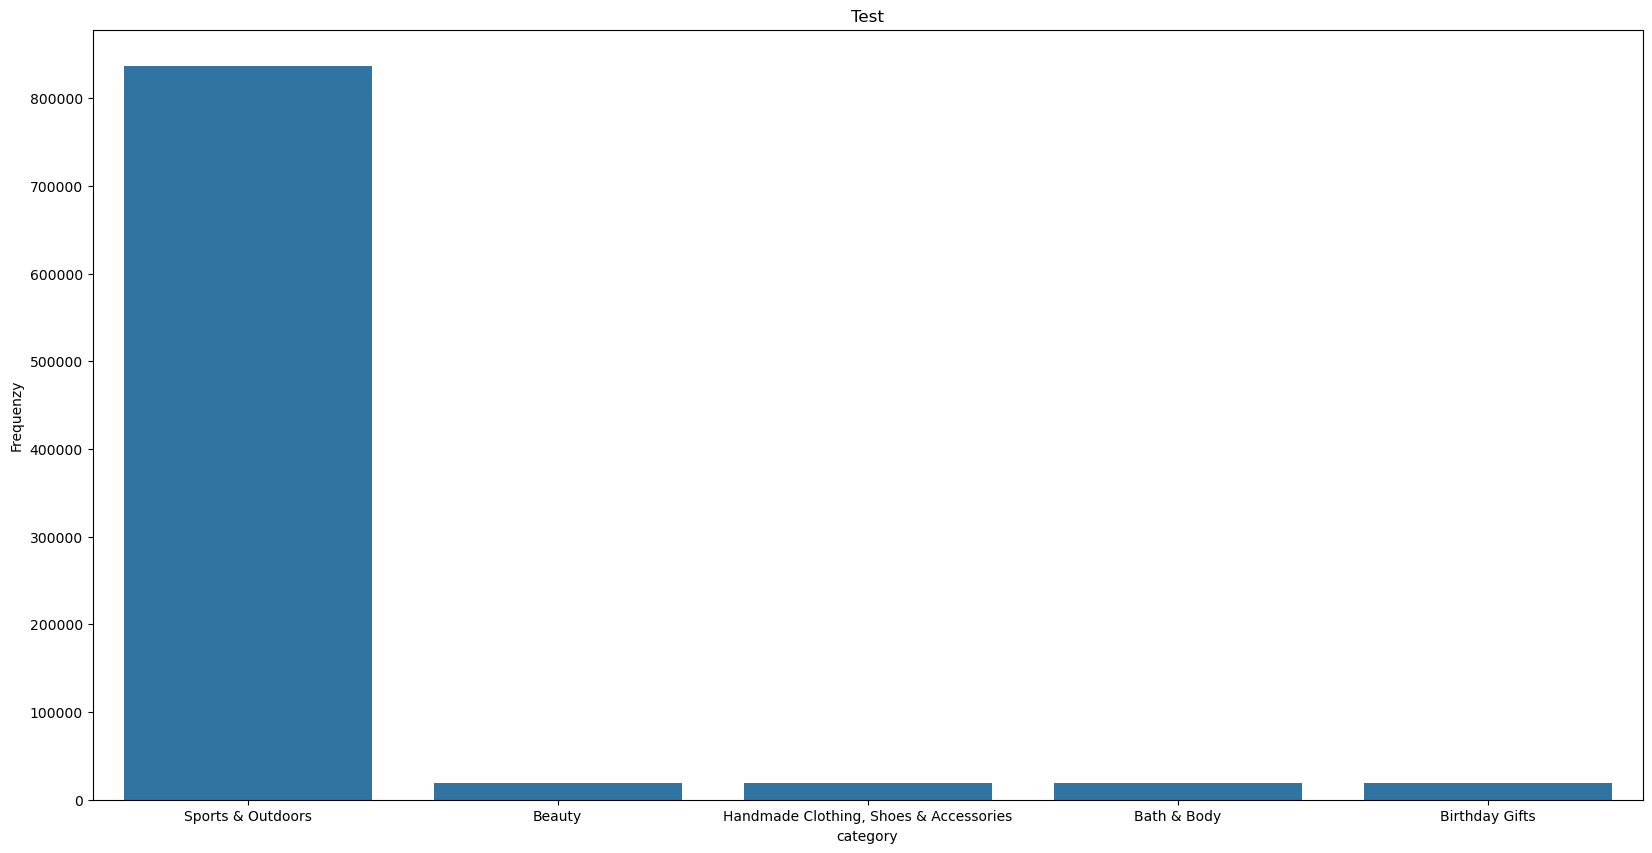

In [10]:
plt.figure(figsize=(20,10))  # figure always needs to happen first 
sns.barplot(data=frequency_table)   
plt.title("Test")
plt.ylabel("Frequenzy")
plt.xlabel("category")

In [58]:
pd.qcut(df["price"], q=4, labels = ["very cheap", "cheap", "expensive", "very expensive"])

0               expensive
1               expensive
2               expensive
3               expensive
4                   cheap
                ...      
2443646         expensive
2443647    very expensive
2443648    very expensive
2443649    very expensive
2443650    very expensive
Name: price, Length: 2443651, dtype: category
Categories (4, object): ['very cheap' < 'cheap' < 'expensive' < 'very expensive']

<Axes: xlabel='price', ylabel='count'>

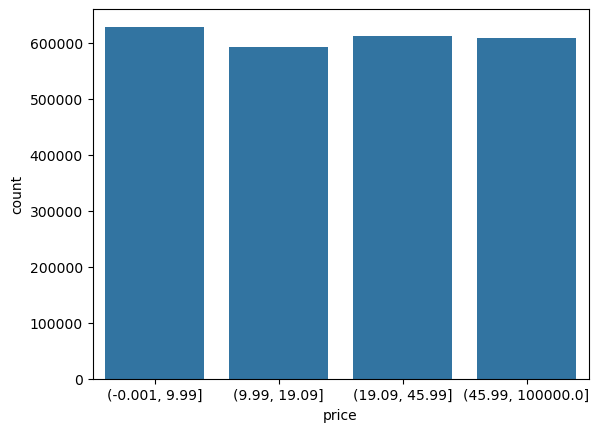

In [60]:
price_bin = pd.qcut(df["price"], q=4)
sns.countplot(x=price_bin)

Measures of Centrality:
Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [61]:
# Calculate mean
mean_price = df['price'].mean()
# Calculate median
median_price = df['price'].median()
# Calculate mode 
mode_price = df['price'].mode()[0]

In [64]:
df['price'].head()

0    21.99
1    23.99
2    21.99
3    31.99
4    17.99
Name: price, dtype: float64

Measures of Dispersion:
Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

In [66]:
df['price'].describe().round(2)
#The large difference between the mean and median indicates right-skewness, meaning that there are extreme high values that pull the average up.
#The high standard deviation (345.61) relative to the mean (89.24) further confirms a wide variation in product prices.
#The maximum price of $100,000 suggests there are likely a few outliers, possibly high-end or luxury products.

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

Visualizations:
Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

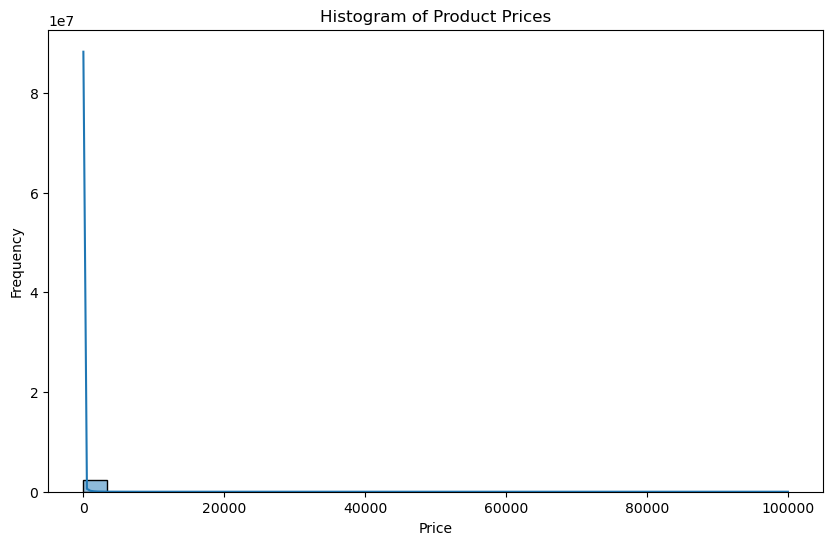

In [68]:
# Create a histogram with price on the x-axis
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)  # kde=True adds a density curve

# Add title and labels
plt.title('Histogram of Product Prices')
plt.xlabel('Price')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label

# Show the plot
plt.show()

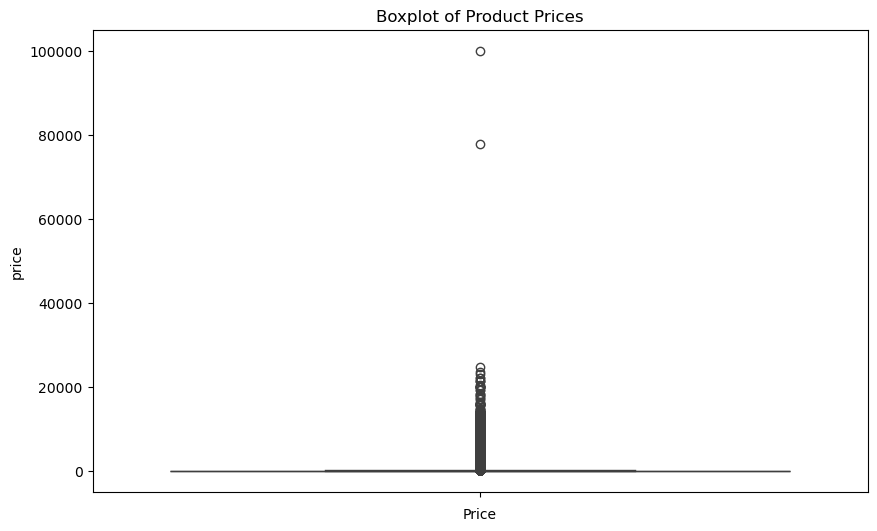

In [71]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'])

# Add title and labels
plt.title('Boxplot of Product Prices')
plt.xlabel('Price')

# Show the plot
plt.show()

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [83]:
# Calculate mean
mean_reviews = df['reviews'].mean()

# Calculate median
median_reviews = df['reviews'].median()

# Calculate mode
mode_reviews = df['reviews'].mode()

print(f"Mean reviews: {mean_reviews}")
print(f"Median reviews: {median_reviews}")
print(f"Mode reviews: {mode_reviews}")

Mean reviews: 480.6277569914853
Median reviews: 0.0
Mode reviews: 0    0
Name: reviews, dtype: int64


In [87]:
df['reviews'].describe().round(2)

count    2443651.00
mean         480.63
std         5944.12
min            0.00
25%            0.00
50%            0.00
75%           59.00
max      1356658.00
Name: reviews, dtype: float64

In [91]:
# Calculate skewness
skewness = skew(df['reviews'], bias=False)

# Calculate kurtosis
kurt = kurtosis(df['reviews'], bias=False)

print(f"Skewness of reviews: {skewness}")
print(f"Kurtosis of reviews: {kurt}")

Skewness of reviews: 102.81782179557167
Kurtosis of reviews: 17741.014604737567


The distribution leans towards lower values with a few extreme high reviews, which skews the data significantly. These values are likely far from normally distributed. A positively skewed and leptokurtic distribution with such high values suggests that the majority of reviews are relatively lower, but some extreme high ratings are affecting the overall distribution.

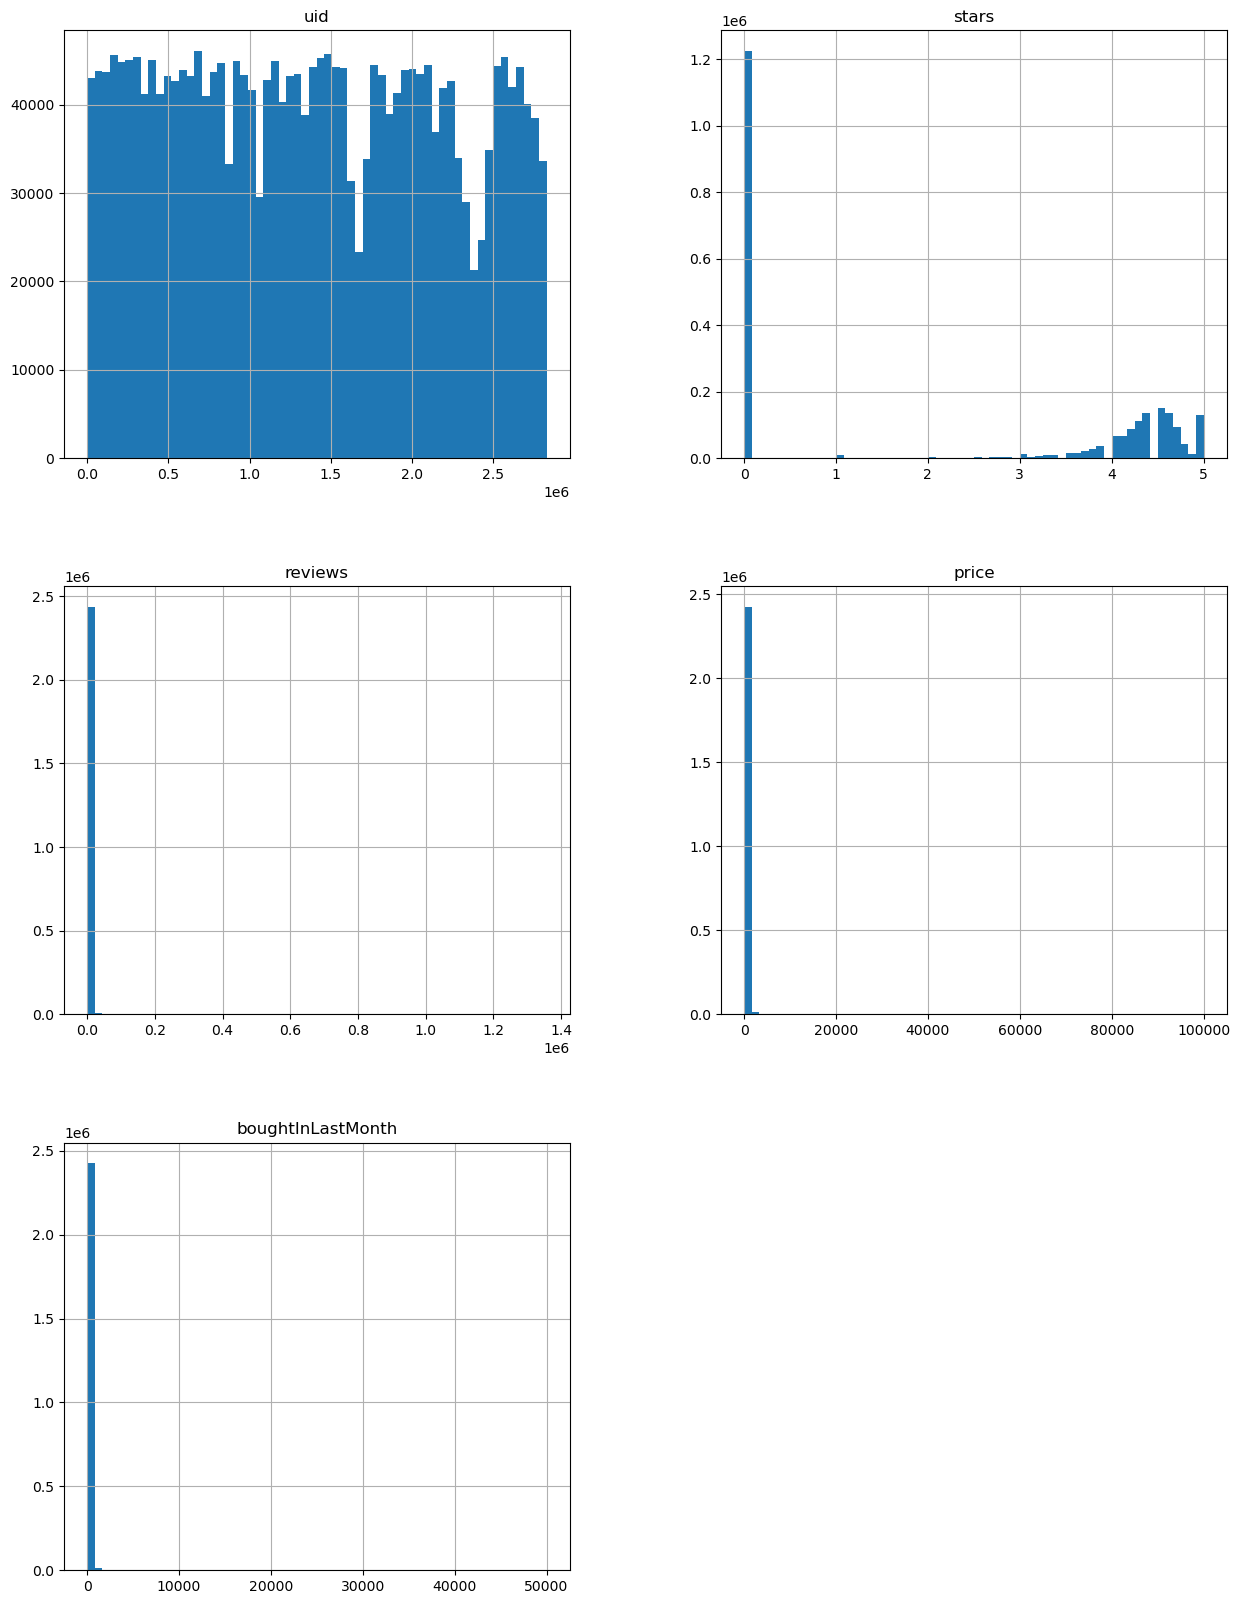

In [101]:
# Creating histograms for each numerical column in 'df_numerical'
df.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);